# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
    
        city_lng = city_weather['coord']['lon']
        
        city_max_temp = city_weather['main']['temp_max']
        
        city_humidity = city_weather['main']['humidity']
        
        city_clouds = city_weather['clouds']['all']
        
        city_wind = city_weather['wind']['speed']
        
        city_country = city_weather['sys']['country']
        
        city_date = city_weather['dt']

        
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qamdo
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | south hedland
Processing Record 7 of Set 1 | esbjerg
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | pendencias
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | kashmor
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | sur
Processing Record 18 of Set 1 | st. john's
Processing Record 19 of Set 1 | nagqu
Processing Record 20 of Set 1 | yeniseysk
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qamdo,31.1667,97.2333,45.90,25,99,8.97,CN,1711884493
1,petropavlovsk-kamchatsky,53.0452,158.6483,34.39,88,75,10.00,RU,1711884494
2,ushuaia,-54.8000,-68.3000,42.46,81,75,8.05,AR,1711884460
3,adamstown,-25.0660,-130.1015,73.87,64,98,32.23,PN,1711884494
4,olonkinbyen,70.9221,-8.7187,19.67,68,100,17.22,SJ,1711884494


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qamdo,31.1667,97.2333,45.90,25,99,8.97,CN,1711884493
1,petropavlovsk-kamchatsky,53.0452,158.6483,34.39,88,75,10.00,RU,1711884494
2,ushuaia,-54.8000,-68.3000,42.46,81,75,8.05,AR,1711884460
3,adamstown,-25.0660,-130.1015,73.87,64,98,32.23,PN,1711884494
4,olonkinbyen,70.9221,-8.7187,19.67,68,100,17.22,SJ,1711884494


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

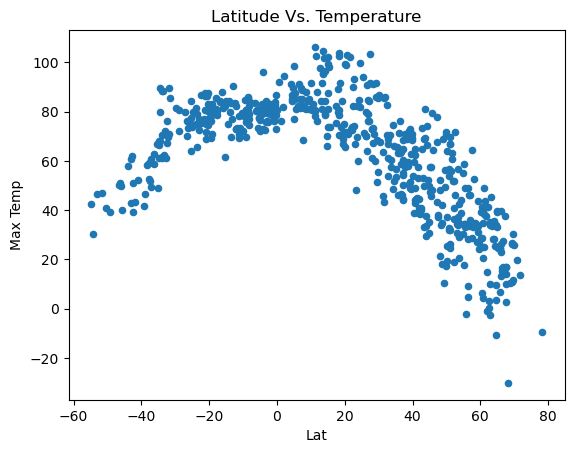

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", title="Latitude Vs. Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

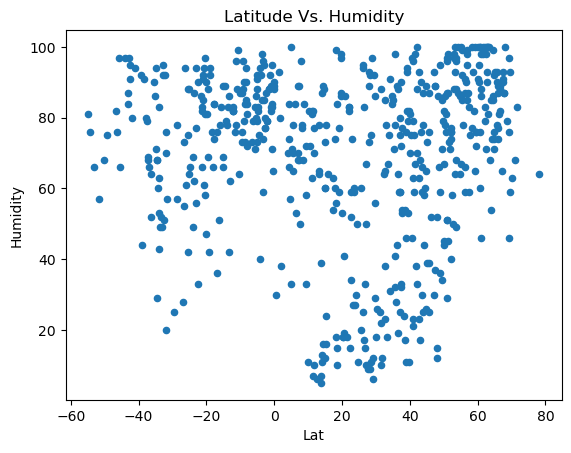

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", title="Latitude Vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

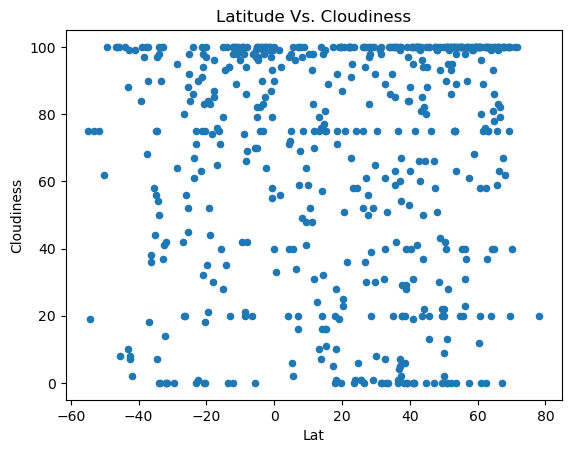

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", title="Latitude Vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

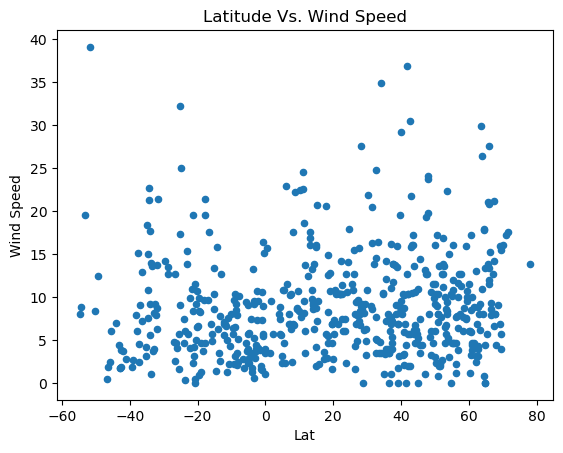

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", title="Latitude Vs. Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation is: {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0)])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qamdo,31.1667,97.2333,45.90,25,99,8.97,CN,1711884493
1,petropavlovsk-kamchatsky,53.0452,158.6483,34.39,88,75,10.00,RU,1711884494
4,olonkinbyen,70.9221,-8.7187,19.67,68,100,17.22,SJ,1711884494
6,esbjerg,55.4667,8.4500,49.10,85,40,4.61,DK,1711884495
7,utrik,11.2278,169.8474,80.20,82,93,24.52,MH,1711884495


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,42.46,81,75,8.05,AR,1711884460
3,adamstown,-25.0660,-130.1015,73.87,64,98,32.23,PN,1711884494
5,south hedland,-20.4089,118.5983,87.73,58,0,9.22,AU,1711884495
8,pendencias,-5.2600,-36.7222,77.43,86,99,3.96,BR,1711884389
9,hermanus,-34.4187,19.2345,79.81,60,54,22.75,ZA,1711884496


###  Temperature vs. Latitude Linear Regression Plot

The correlation is: -0.85
The r-squared is: 0.7236644016756825


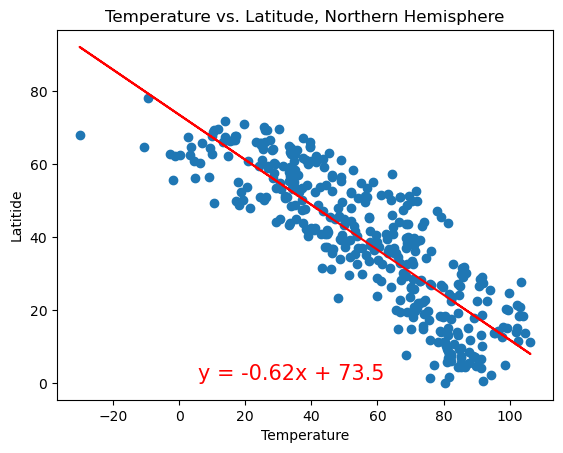

In [15]:
# Linear regression on Northern Hemisphere
plt.title("Temperature vs. Latitude, Northern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitide")
linear_regression(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"])


The correlation is: 0.72
The r-squared is: 0.5229156041232836


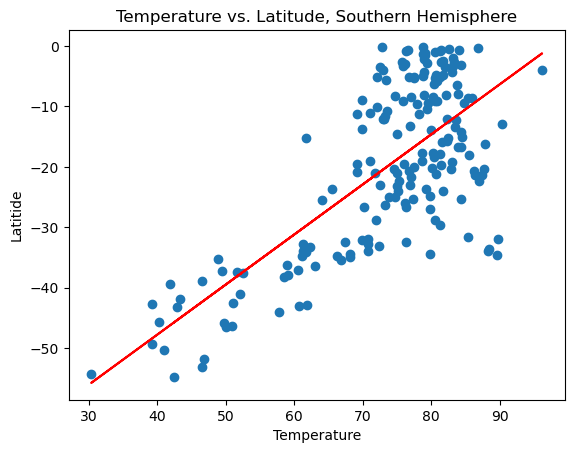

In [17]:
# Linear regression on Southern Hemisphere
plt.title("Temperature vs. Latitude, Southern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** There is a strong correlation between Latitude and Max Temps. There is a consistent decrease in Max Temps the further away you get from the equator as shown by lower temperature values for higher positive or negative latitudes in the northern and southern hemispheres, respectively. The graphs appear to oppose each other but are illustrating the same thing. The difference is the scale of latitude in positive or negative numbers north and south of the equator. 

### Humidity vs. Latitude Linear Regression Plot

The correlation is: 0.34
The r-squared is: 0.11623589677043893


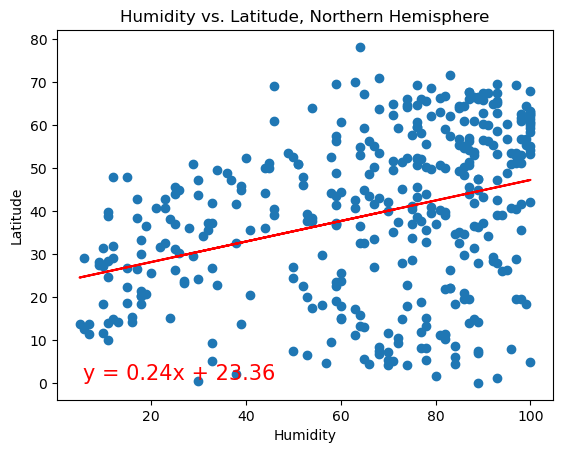

In [18]:
# Northern Hemisphere
plt.title("Humidity vs. Latitude, Northern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
linear_regression(northern_hemi_df["Humidity"], northern_hemi_df["Lat"])

The correlation is: 0.23
The r-squared is: 0.05148999340129015


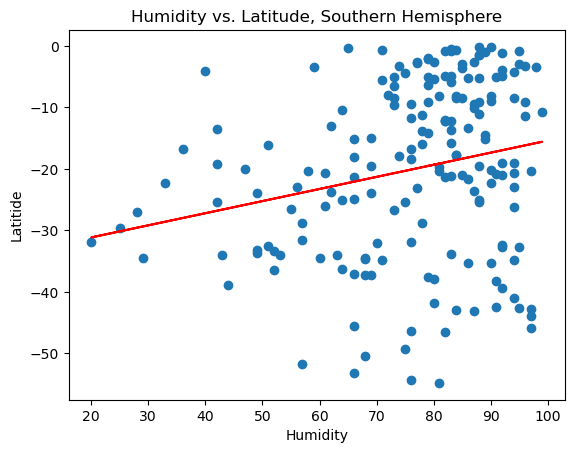

In [19]:
# Southern Hemisphere
plt.title("Humidity vs. Latitude, Southern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Humidity"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** There isn't a significantly meaningful relationship between Humidity and Latitude. The northern and southern hemisphere data contradict each other with humidity increasing at higher latitude (slightly) in the north hemisphere and decreasing with lower latitudes in the southern hemisphere (or, humidity decreasing and increasing the closer you get to the equator in the northern and southern hemispheres, respectively). Other factors such as land geography likely play a bigger role in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation is: 0.17
The r-squared is: 0.029656923642176102


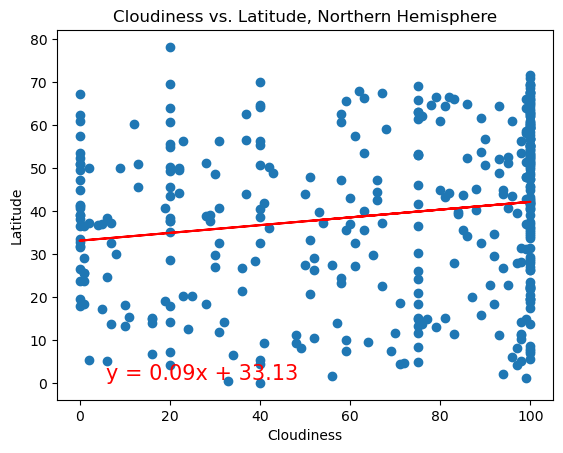

In [20]:
# Northern Hemisphere
plt.title("Cloudiness vs. Latitude, Northern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
linear_regression(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"])

The correlation is: 0.28
The r-squared is: 0.07846579002786268


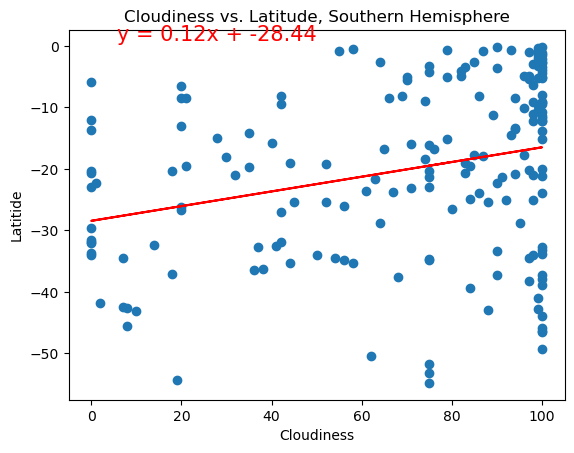

In [21]:
# Southern Hemisphere
# Southern Hemisphere
plt.title("Cloudiness vs. Latitude, Southern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** Based on how dispersed the data points are and the low correlation, there isn't a significantly meaningful relationship between Cloudiness and Latitude

### Wind Speed vs. Latitude Linear Regression Plot

The correlation is: 0.01
The r-squared is: 6.459833100818559e-05


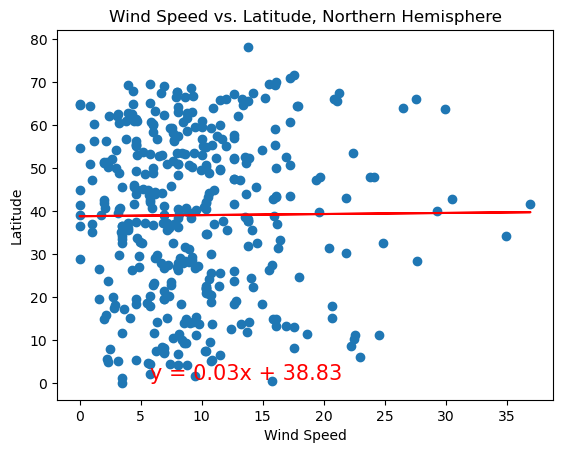

In [22]:
# Northern Hemisphere
plt.title("Wind Speed vs. Latitude, Northern Hemisphere")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
linear_regression(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"])

The correlation is: -0.21
The r-squared is: 0.04582527788150378


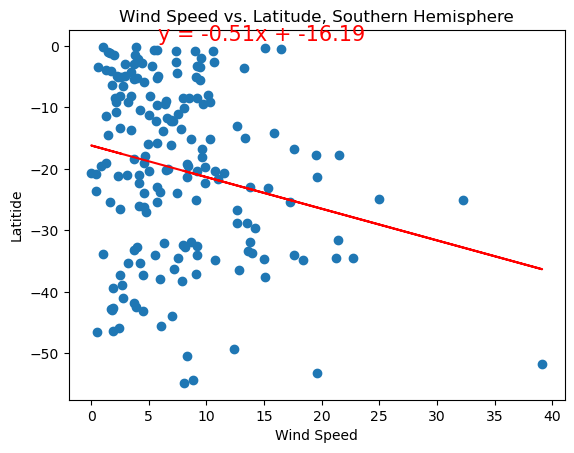

In [23]:
# Southern Hemisphere
# Southern Hemisphere
plt.title("Wind Speed vs. Latitude, Southern Hemisphere")
plt.xlabel("Wind Speed")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** Based on low correlation in both hemispheres, and almost zero correlation in the northern hemisphere, there isn't a significantly meaningful relationship between Wind Speed and Latitude